# **DEPENDENCIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[MiniSom: minimalistic and NumPy-based implementation of the Self Organizing Map](https://github.com/JustGlowing/minisom/) by Giuseppe Vettigli (2018)


In [ ]:
!pip install MiniSom

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow import keras

from minisom import MiniSom
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import sklearn
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
%cd /content/drive/MyDrive/imby_project/Transcript_score

In [ ]:
def EDA(df):
    df = df.drop(
        columns=[
            "temperature",
            "seek",
            "avg_logprob",
            "compression_ratio",
            "no_speech_prob",
        ]
    )
    summary_stats = df.describe()
    summary_stats
    sns.histplot(df["positive"], kde=True, label="Positive Score", color="green")
    sns.histplot(df["negative"], kde=True, label="Negative Score", color="red")
    sns.histplot(df["neutral"], kde=True, label="Neutral Score", color="blue")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Distribution of Sentiment Scores")
    plt.show()
    corr_matrix = df[
        [
            "positive",
            "negative",
            "neutral",
            "confident",
            "hesitant",
            "concise",
            "enthusiastic",
            "speech_speed",
        ]
    ].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()


**EDA on 1st csv file**

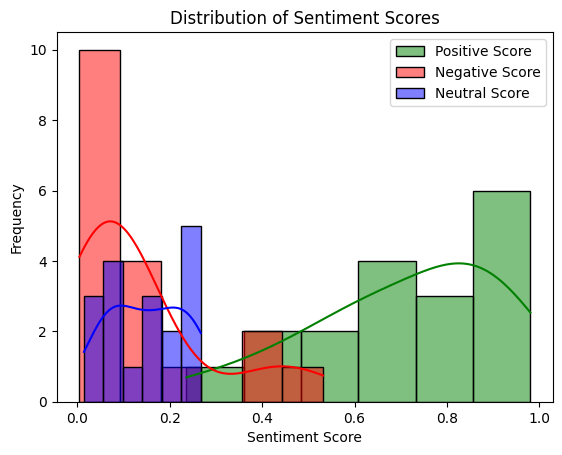

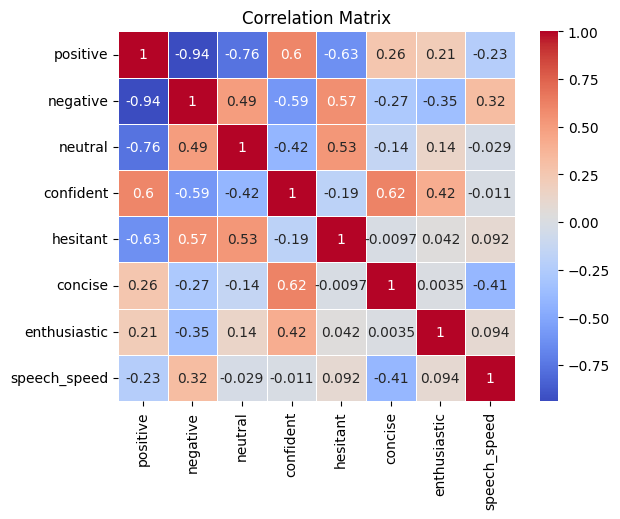

In [ ]:
eda1 = EDA(pd.read_csv('1.csv'))

**EDA on 2nd csv file**

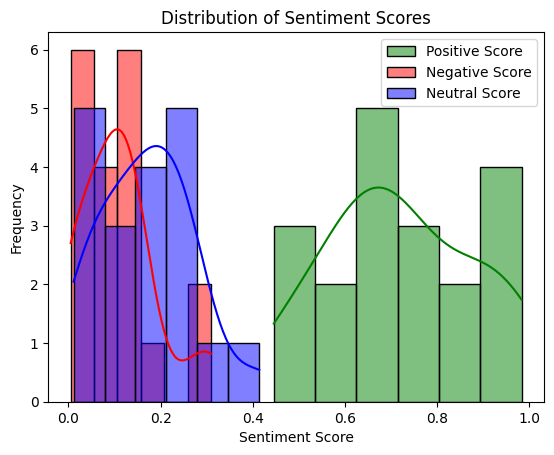

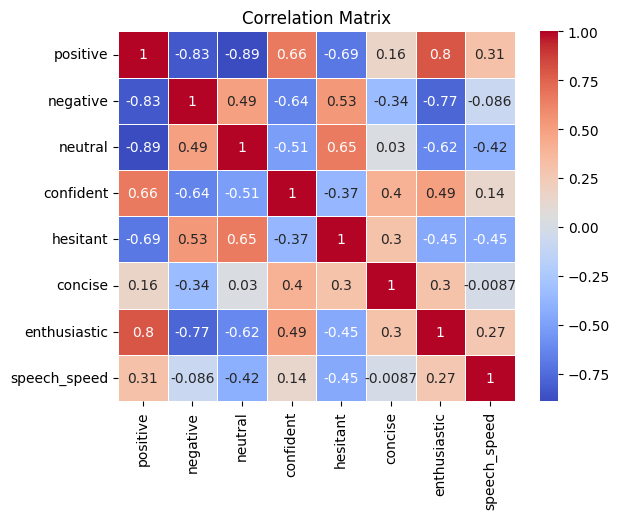

In [ ]:
eda2 = EDA(pd.read_csv('2.csv'))

**ED on 3rd csv file**

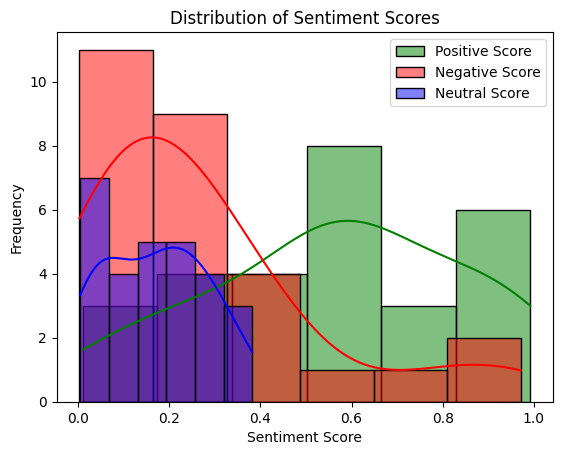

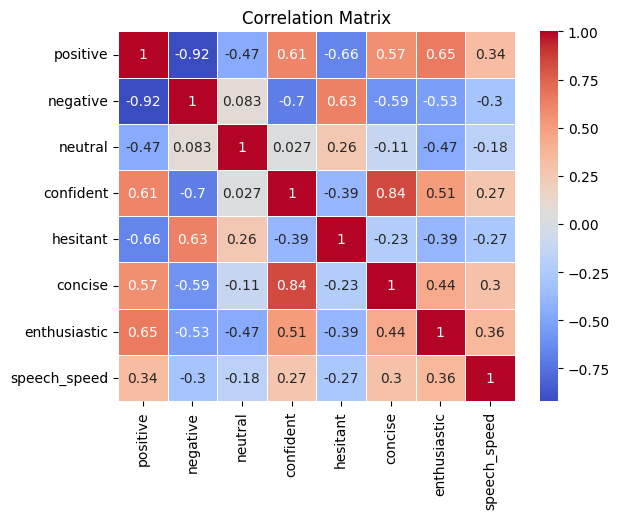

In [ ]:
eda3 = EDA(pd.read_csv('3.csv'))

**EDA on 4th csv file**

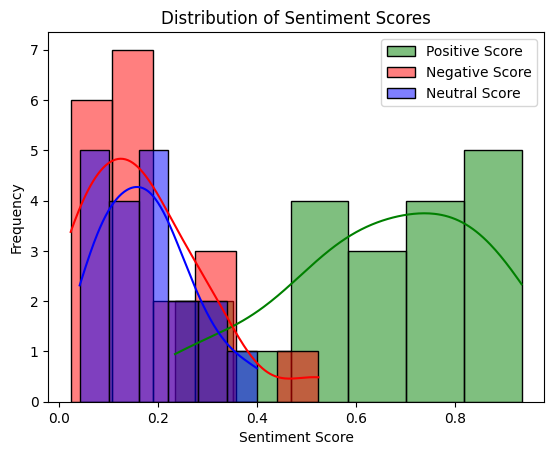

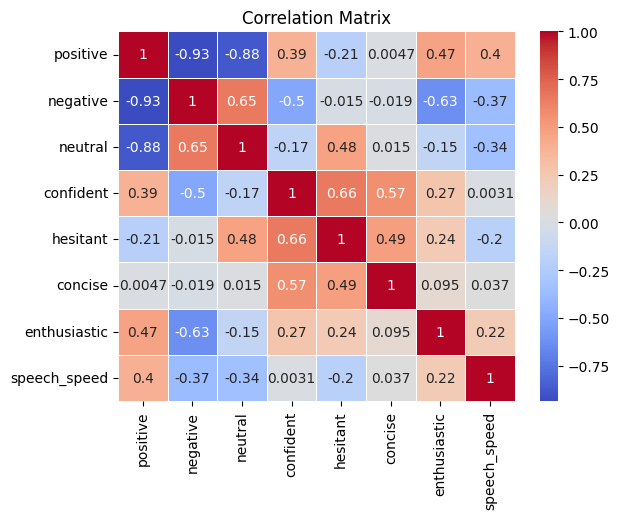

In [ ]:
eda4 = EDA(pd.read_csv('4.csv'))

**EDA on 5th csv file**

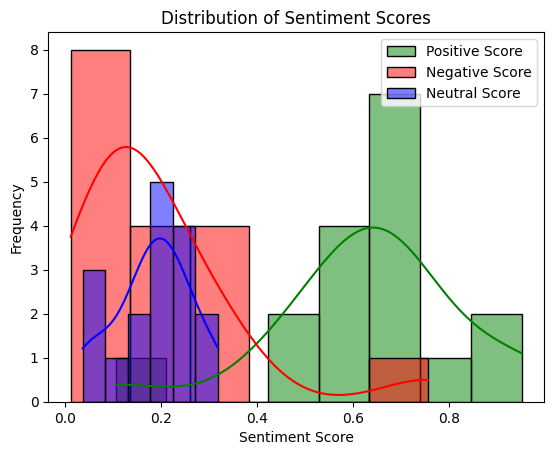

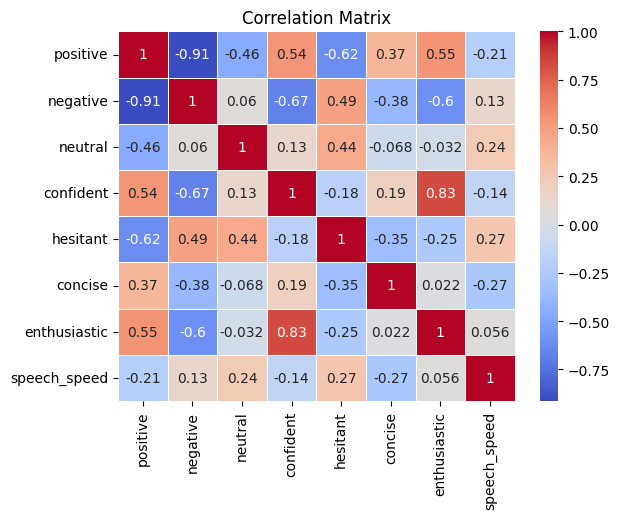

In [ ]:
eda5 = EDA(pd.read_csv('5.csv'))

**EDA on 6th csv file**

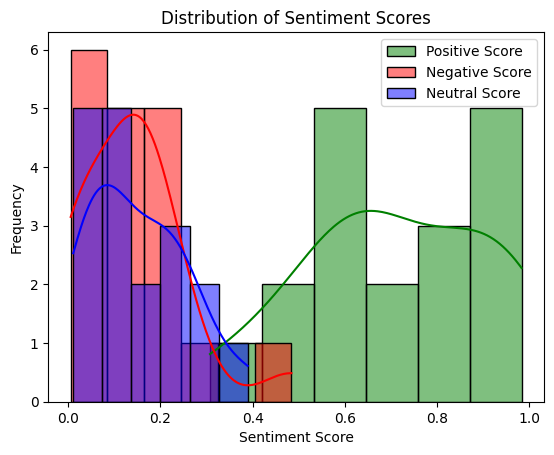

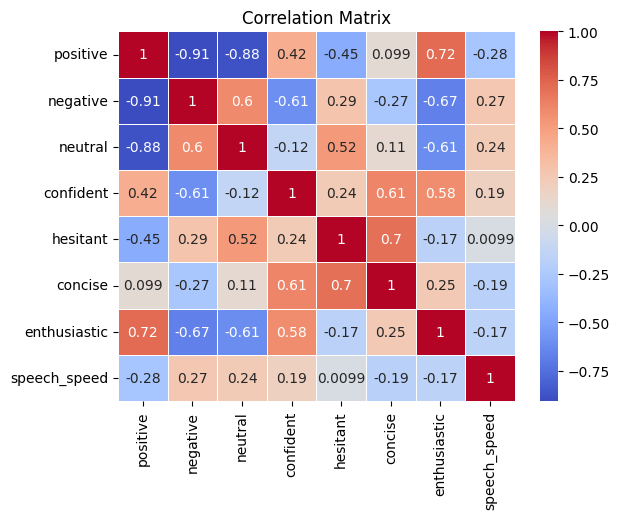

In [ ]:
eda6 = EDA(pd.read_csv('6.csv'))

**EDA on 7th csv file**

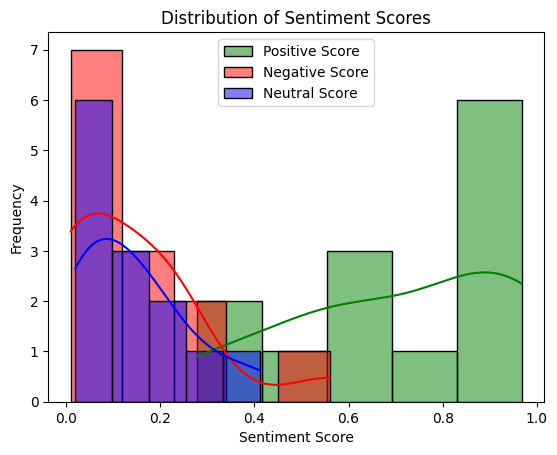

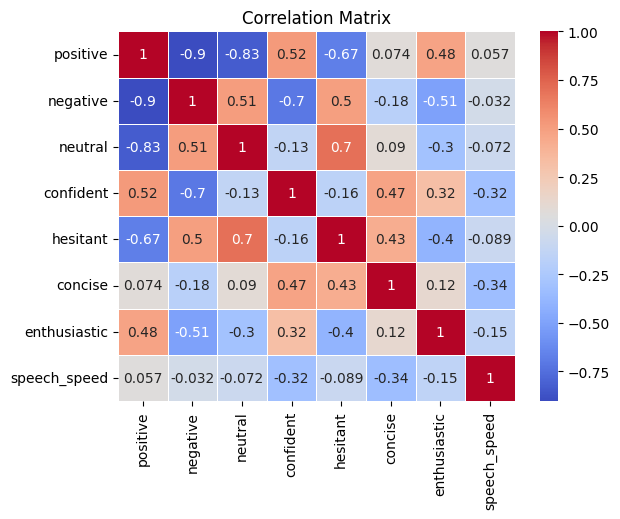

In [ ]:
eda7 = EDA(pd.read_csv('7.csv'))

**EDA on 8th csv file**

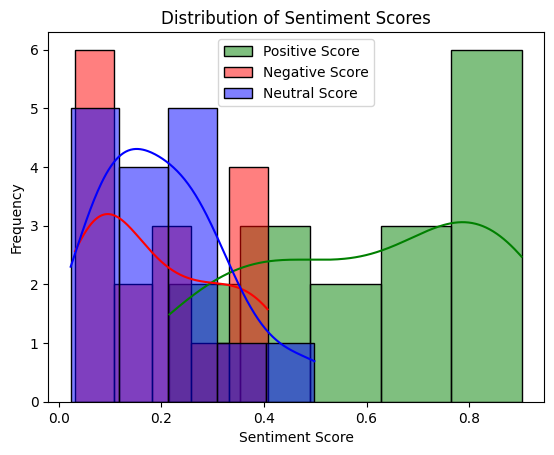

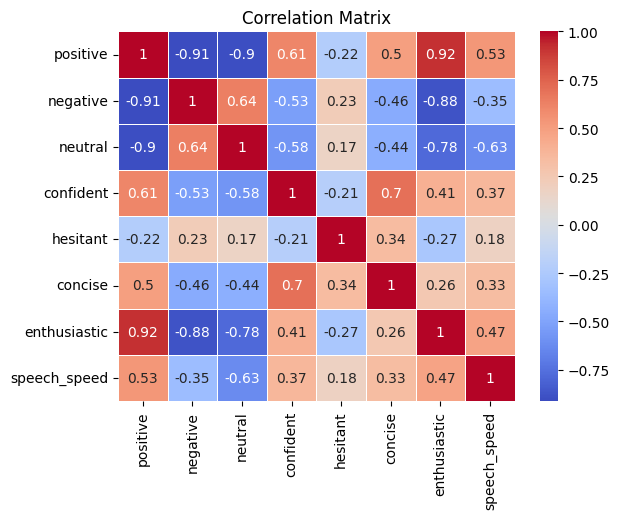

In [ ]:
eda8 = EDA(pd.read_csv('8.csv'))

**EDA on 9th csv file**

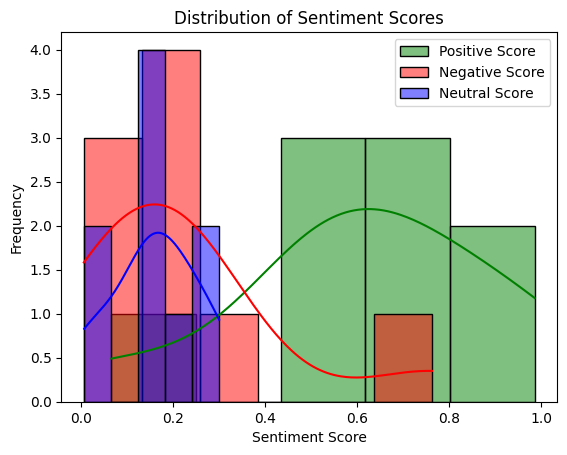

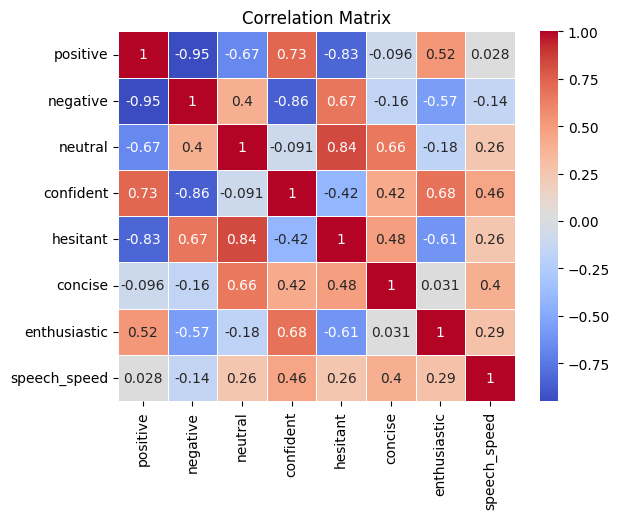

In [ ]:
eda9 = EDA(pd.read_csv('9.csv'))

**EDA on 10th csv file**

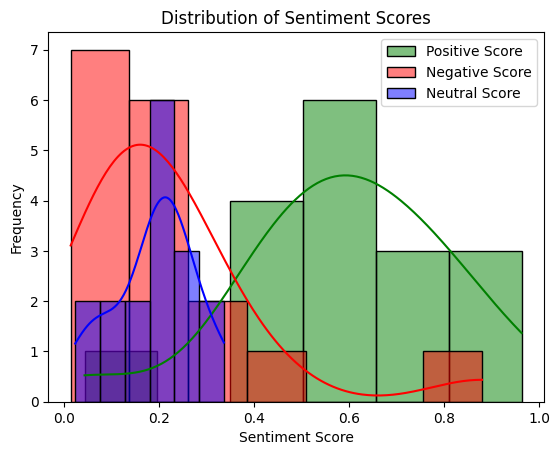

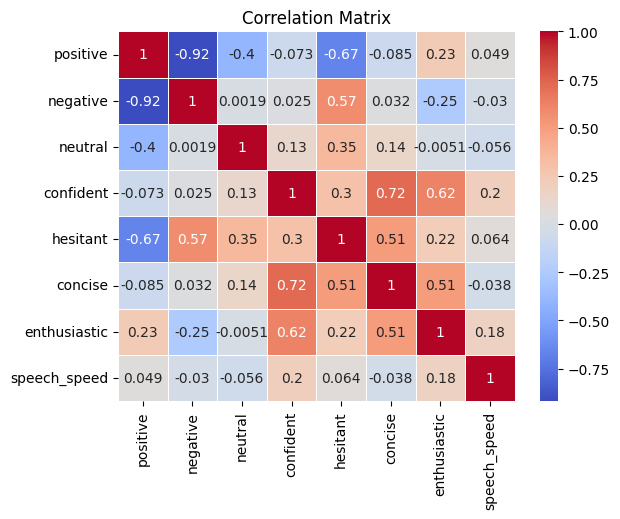

In [ ]:
eda10 = EDA(pd.read_csv('10.csv'))

## **NAIVE APRROACH**

In [ ]:
# We can also try this i.e. giving arbitrary scores to every csv file by defining
# our own weights for each column
def transcript_score(df):
    weights = {
        "positive": 0.2,
        "negative": -0.2,
        "neutral": 0.1,
        "confident": 0.2,
        "hesitant": -0.1,
        "concise": 0.1,
        "enthusiastic": 0.1,
        "speech_speed": 0.1,
    }

    df["hypothetical_score"] = np.dot(
        df[list(weights.keys())].values, list(weights.values())
    )

    # Normalizinging the hypothetical score between 0 and 1
    df["hypothetical_score"] = (
        df["hypothetical_score"] - df["hypothetical_score"].min()
    ) / (df["hypothetical_score"].max() - df["hypothetical_score"].min())

    # Outputing the hypothetical score for this person
    hypothetical_score = df["hypothetical_score"].mean()
    print(
        f"Overall Hypothetical Score considering all scores: {hypothetical_score:.2f}"
    )


score1 = transcript_score(pd.read_csv("1.csv"))
score2 = transcript_score(pd.read_csv("2.csv"))
score3 = transcript_score(pd.read_csv("3.csv"))
score4 = transcript_score(pd.read_csv("4.csv"))
score5 = transcript_score(pd.read_csv("5.csv"))
score6 = transcript_score(pd.read_csv("6.csv"))
score7 = transcript_score(pd.read_csv("7.csv"))
score8 = transcript_score(pd.read_csv("8.csv"))
score9 = transcript_score(pd.read_csv("9.csv"))
score10 = transcript_score(pd.read_csv("10.csv"))

Overall Hypothetical Score considering all scores: 0.52
Overall Hypothetical Score considering all scores: 0.44
Overall Hypothetical Score considering all scores: 0.58
Overall Hypothetical Score considering all scores: 0.66
Overall Hypothetical Score considering all scores: 0.63
Overall Hypothetical Score considering all scores: 0.56
Overall Hypothetical Score considering all scores: 0.63
Overall Hypothetical Score considering all scores: 0.52
Overall Hypothetical Score considering all scores: 0.60
Overall Hypothetical Score considering all scores: 0.55


In [ ]:
filename = [
    "1.csv",
    "2.csv",
    "3.csv",
    "4.csv",
    "5.csv",
    "6.csv",
    "7.csv",
    "8.csv",
    "9.csv",
    "10.csv",
]
# Combining every person's data to train SOM(Self-organizing Map) on whole data
data_frames = [pd.read_csv(file) for file in filename]
combined_data = pd.concat(data_frames, ignore_index=True)
combined_data.to_csv("combined_data.csv", index=False)
combined_data = pd.read_csv("combined_data.csv")

# **FINDING CATEGORICAL EXTREMES**

In this approach we use SOMs on data which has the +-n scores in an attempt to cluster it into two groups, the accepted and rejected clusters. Note that this is a soft decision boundary.

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.47371033843407834


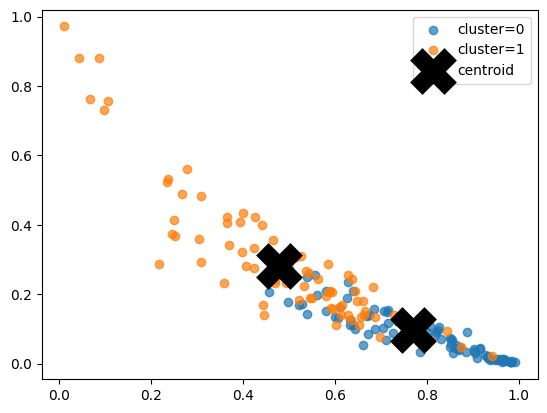

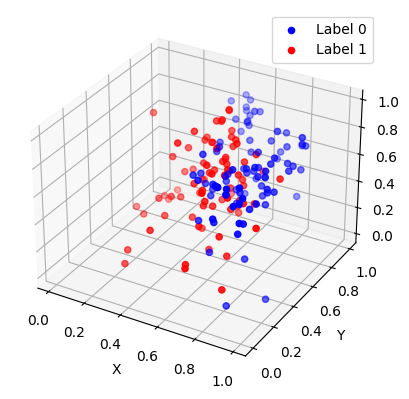

Epoch 1/50
5/5 - 1s - loss: 0.6977 - accuracy: 0.4892 - 596ms/epoch - 119ms/step
Epoch 2/50
5/5 - 0s - loss: 0.6916 - accuracy: 0.5540 - 12ms/epoch - 2ms/step
Epoch 3/50
5/5 - 0s - loss: 0.6864 - accuracy: 0.6259 - 16ms/epoch - 3ms/step
Epoch 4/50
5/5 - 0s - loss: 0.6811 - accuracy: 0.6906 - 18ms/epoch - 4ms/step
Epoch 5/50
5/5 - 0s - loss: 0.6748 - accuracy: 0.7338 - 14ms/epoch - 3ms/step
Epoch 6/50
5/5 - 0s - loss: 0.6677 - accuracy: 0.8058 - 12ms/epoch - 2ms/step
Epoch 7/50
5/5 - 0s - loss: 0.6591 - accuracy: 0.8345 - 14ms/epoch - 3ms/step
Epoch 8/50
5/5 - 0s - loss: 0.6486 - accuracy: 0.8489 - 14ms/epoch - 3ms/step
Epoch 9/50
5/5 - 0s - loss: 0.6381 - accuracy: 0.8345 - 14ms/epoch - 3ms/step
Epoch 10/50
5/5 - 0s - loss: 0.6268 - accuracy: 0.8201 - 19ms/epoch - 4ms/step
Epoch 11/50
5/5 - 0s - loss: 0.6142 - accuracy: 0.8273 - 13ms/epoch - 3ms/step
Epoch 12/50
5/5 - 0s - loss: 0.6011 - accuracy: 0.8417 - 15ms/epoch - 3ms/step
Epoch 13/50
5/5 - 0s - loss: 0.5860 - accuracy: 0.8489 - 1

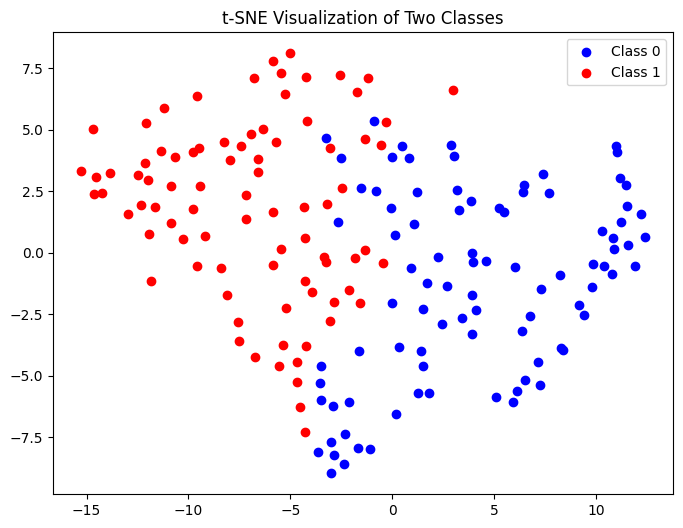

In [ ]:
# Initialization and training
def som(df):
    emotions = [
        "positive",
        "negative",
        "neutral",
        "confident",
        "hesitant",
        "concise",
        "enthusiastic",
    ]
    new_df = df[emotions].to_numpy()
    som_shape = (1, 2)
    som = MiniSom(
        som_shape[0],
        som_shape[1],
        new_df.shape[1],
        sigma=0.5,
        learning_rate=0.5,
        neighborhood_function="gaussian",
        random_seed=10,
    )

    som.train_batch(new_df, 500, verbose=True)

    # each neuron represents a cluster
    winner_coordinates = np.array([som.winner(x) for x in new_df]).T
    # with np.ravel_multi_index we convert the bidimensional
    # coordinates to a monodimensional index
    cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
    # plotting the clusters using the first 2 dimentions of the data
    for c in np.unique(cluster_index):
        plt.scatter(
            new_df[cluster_index == c, 0],
            new_df[cluster_index == c, 1],
            label="cluster=" + str(c),
            alpha=0.7,
        )
    # plotting centroids
    for centroid in som.get_weights():
        plt.scatter(
            centroid[:, 0],
            centroid[:, 1],
            marker="x",
            s=80,
            linewidths=35,
            color="k",
            label="centroid",
        )
    plt.legend()
    # Sample 3D coordinates and color labels (replace with your data)
    coordinates = new_df[:, [0, 4, 3]]  # 100 random 3D points
    colors = cluster_index  # Random color labels (0 or 1)

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Separate the points based on color labels and plot them
    ax.scatter(
        coordinates[colors == 0, 0],
        coordinates[colors == 0, 1],
        coordinates[colors == 0, 2],
        c="b",
        label="Label 0",
    )
    ax.scatter(
        coordinates[colors == 1, 0],
        coordinates[colors == 1, 1],
        coordinates[colors == 1, 2],
        c="r",
        label="Label 1",
    )

    # Set labels and legend
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

    # Show the plot
    plt.show()
    # Creating random features and labels for binary classification
    X = new_df
    y = cluster_index

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Build a simple feedforward neural network
    model = keras.Sequential(
        [
            keras.layers.Dense(32, activation="relu", input_shape=(7,)),
            keras.layers.Dense(16, activation="relu"),
            keras.layers.Dense(
                1, activation="sigmoid"
            ),  # Output layer for binary classification
        ]
    )

    # Compile the model
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    epochs = 50
    batch_size = 32

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Accuracy on the test set: {accuracy:.2f}")

    # Generate a synthetic dataset with two classes (replace with your own data)
    np.random.seed(42)

    # Create a t-SNE model
    tsne = TSNE(n_components=2, perplexity=30, random_state=42)

    # Fit and transform the data
    X_tsne = tsne.fit_transform(X)

    # Plot the t-SNE visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="Class 0", c="blue")
    plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Class 1", c="red")
    plt.title("t-SNE Visualization of Two Classes")
    plt.legend()

    plt.show()

som(combined_data)